In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from matplotlib import rc
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['font.size'] = 11

In [2]:
data = np.load("CartPoleStates.npz", allow_pickle=True)

In [3]:
# CartPole states: [position, velocity, angle, angular_velocity]
states = data['states']

# CartPole actions: [0:Left, 1:Right]
actions = data['actions']

print(f"Loaded {len(states)} episodes.")

# Select an episode to analyze 
episodeNumber = 0
cartAction = actions[episodeNumber][:]
poleAngles = states[episodeNumber][:, 2]

Loaded 750 episodes.


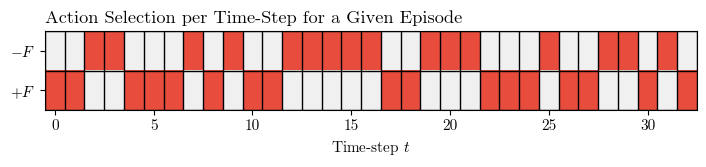

In [4]:
# Initialize 2 x T_{end} grid
# Row 0 will represent Action 0 (Left)
# Row 1 will represent Action 1 (Right)
grid = np.zeros((2, len(cartAction)))

# Set the cell for the taken action to 1 (which we will map to Pink)
for t, action in enumerate(cartAction):
    grid[action, t] = 1

# Define colors: 0 -> Light Gray, 1 -> Red
custom_cmap = ListedColormap(['#F0F0F0', '#E74C3C']) 

fig, ax = plt.subplots(1, 1, figsize=(7.2, 1.8))
ax.imshow(grid, aspect='auto', cmap=custom_cmap, interpolation='nearest')
ax.set_title(f"Action Selection per Time-Step for a Given Episode", loc='left', fontsize="large")
ax.set_yticks([0, 1], [r'$-F$', r'$+F$'])
ax.set_xlabel(r"Time-step $t$")

# Add white grid lines to separate the time-steps visually
fig.gca().set_xticks(np.arange(-.5, len(cartAction), 1), minor=True)
fig.gca().set_yticks(np.arange(-.5, 2, 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

fig.tight_layout()

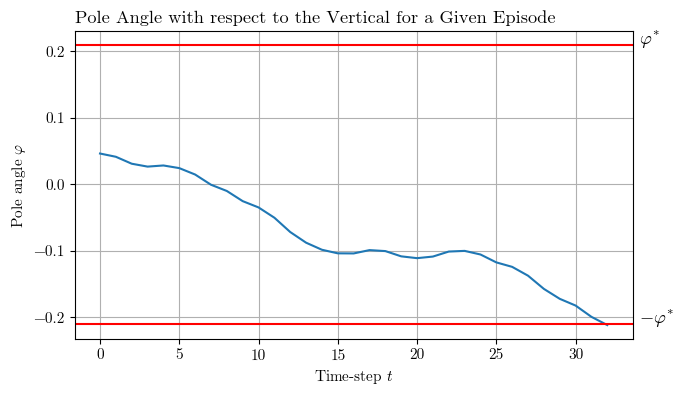

In [29]:
# Plot progression of angles
fig, ax = plt.subplots(1, 1, figsize=(7.2, 4.0))
ax.plot(np.arange(0, len(poleAngles), 1), poleAngles)

# Termination angle in the CartPole environment is halved of "allowable obseration"
# https://gymnasium.farama.org/environments/classic_control/cart_pole/#observation-space
ax.axhline(y=0.41887903/2, color='r', linestyle='-')
ax.text(x=len(poleAngles)+1, y=0.41887903/2, s=r"$\varphi^{*}$", color='black', fontsize="large")
ax.axhline(y=-0.41887903/2, color='r', linestyle='-')
ax.text(x=len(poleAngles)+1, y=-0.41887903/2, s=r"$-\varphi^{*}$", color='black', fontsize="large")

ax.set_ylabel(r"Pole angle $\varphi$")
ax.set_xlabel(r"Time-step $t$")
ax.set_title(f"Pole Angle with respect to the Vertical for a Given Episode", loc='left', fontsize="large")

plt.grid()